<a href="https://colab.research.google.com/github/shivamjha-9/house-price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load data
df = pd.read_csv("house.csv")

In [30]:
# View dataset info
print("Sample Data:\n", df.head())
print("\nDataset Summary:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Sample Data:
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0     0          3        1340              0      1955          2005  
1     4          5        3370            280      1921             0  
2     0          4        1930              0      1966             0  
3     0          4        1000           1000      1963             0  
4     0          4        1140            800      1976          1992  

Dataset Summary:
               price     bedrooms    bathrooms   sqft_l

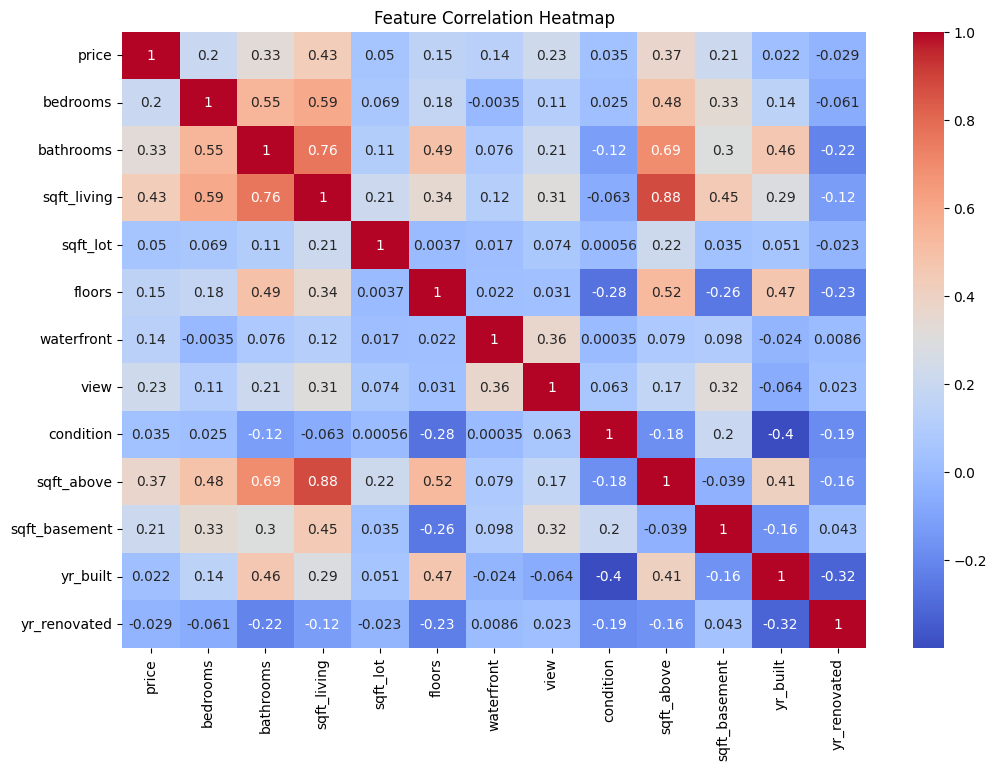

In [32]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [31]:
# Define features and target variable
# Let's assume the target is 'MEDV' (median value of homes in $1000s)
X = df.drop('price', axis=1)
y = df['price']

In [8]:
# Drop non-numeric or irrelevant columns
df = df.drop(columns=["date", "street", "city", "statezip", "country"])

In [9]:
# Drop rows with missing values (if any)
df = df.dropna()

In [10]:
# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

In [11]:
# Train-Test Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Predict
y_pred = model.predict(X_test)

In [15]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 986921767056.10
R² Score: 0.03


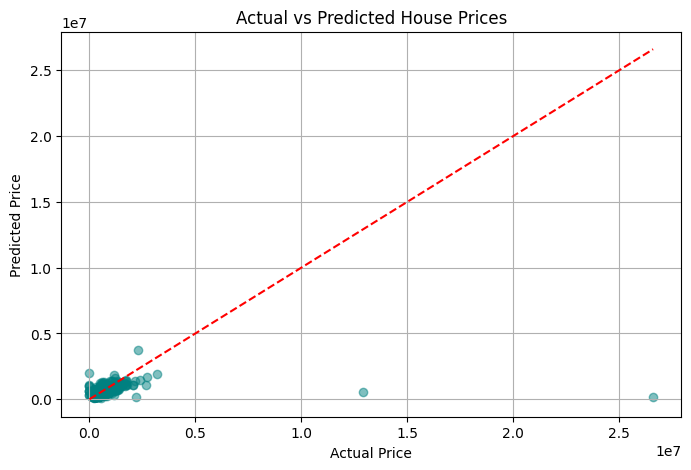

In [16]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [21]:
# 10. Predict on New Data (optional)
# Example: input must have same number of features
sample_data = np.array([X.iloc[0]])  # change this as needed
sample_pred = model.predict(sample_data)
print(f"\nPredicted house price for sample input: ${sample_pred[0]*1000:.2f}")


Predicted house price for sample input: $348546739.83


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
